In [76]:
import pandas as pd
from matplotlib import pyplot as plt

In [77]:
# Load a file under "data" folder
file = "./data/sense.csv"
data = pd.read_csv(file, sep=",", encoding="euc-kr")

In [78]:
data['Sensor time'] = data['Sensor time'].astype(str)
data["Sensor time"]= data["Sensor time"].str[:12]
data['Sensor time'] = pd.to_datetime(data['Sensor time'], format="%Y%m%d%H%M")

In [79]:
data.drop('Time', axis = 1, inplace = True)
data.drop('Barn number', axis = 1, inplace = True)
data.drop('Module ID', axis = 1, inplace = True)

In [80]:
#Checking the null values in the data fields
data.isnull().sum(axis=0)

Type                    0
Vlaue                   0
Sensor time             0
dtype: int64

In [81]:
data[['Sensor time', 'Collecting device ID', 'Type', 'Vlaue']]

,Sensor time,Collecting device ID,Type,Vlaue
0,2021-06-30 23:58:00,GW01,humidity,99.899950
1,2021-06-30 23:58:00,GW01,temp,21.099990
2,2021-06-30 23:58:00,GW01,co2,402.890000
3,2021-06-30 23:58:00,GW01,nh3,4.380000
4,2021-06-30 23:56:00,GW01,humidity,99.899940
...,...,...,...,...
38919,2021-06-10 12:27:00,GW01,humidity,45.639000
38920,2021-06-10 12:23:00,GW01,nh3,11.934230
38921,2021-06-10 12:23:00,GW01,co2,409.215100
38922,2021-06-10 12:16:00,GW01,co2,402.246300


In [82]:
pivoted = data.pivot(['Sensor time','Collecting device ID'], 'Type', 'Vlaue')
#pivoted = data.pivot('Sensor time', 'Type', 'Vlaue')
pivoted = pivoted.reset_index()

In [83]:
pivoted_sorted = pivoted.sort_values(by='Sensor time' ,ascending=True)

In [84]:
filtered_df=pivoted_sorted.loc['2021-06-01':]
filtered_df

Type,Sensor time,Collecting device ID,co2,humidity,nh3,temp
2022,2021-06-16 18:55:00,GW01,NaN,44.72834,NaN,28.93501
2023,2021-06-16 18:57:00,GW01,NaN,44.51500,NaN,28.91834
2024,2021-06-16 18:59:00,GW01,NaN,44.85167,NaN,28.92335
2025,2021-06-16 19:01:00,GW01,NaN,45.24334,NaN,28.89168
2026,2021-06-16 19:03:00,GW01,NaN,45.31334,NaN,28.90001
...,...,...,...,...,...,...
13001,2021-06-30 23:50:00,GW01,402.92,99.89994,4.42,21.10499
13002,2021-06-30 23:52:00,GW01,402.91,99.89994,4.41,21.11694
13003,2021-06-30 23:54:00,GW01,402.92,99.89994,4.42,21.10168
13004,2021-06-30 23:56:00,GW01,402.89,99.89994,4.39,21.10338


In [116]:
grouped_df = filtered_df.groupby(pd.Grouper(key='Sensor time' ,freq='1h'))[['Collecting device ID','co2','humidity','nh3','temp']]. \
agg({'Collecting device ID' : 'max','co2' : ['mean','median','std'],'humidity' : ['mean','median','std'],
     'nh3' : ['mean','median','std'],'temp' : ['mean','median','std']})

grouped_df_mean = filtered_df.groupby(pd.Grouper(key='Sensor time' ,freq='1h'))[['Collecting device ID','co2','humidity','nh3','temp']]. \
agg({'Collecting device ID' : 'max','co2' : ['mean'],'humidity' : ['mean'],
     'nh3' : ['mean'],'temp' : ['mean']})

grouped_df_mean = filtered_df.groupby(pd.Grouper(key='Sensor time' ,freq='1d')).mean()

In [117]:
grouped_df_mean

Type,co2,humidity,nh3,temp
Sensor time,,,,
2021-06-16,402.534100,50.512948,3.912415,28.089424
2021-06-17,415.353498,60.345579,18.499908,27.565892
2021-06-18,417.109179,77.264726,20.311725,25.676349
2021-06-19,414.057803,77.655884,16.460807,25.054714
2021-06-20,414.301903,NaN,16.768306,NaN
2021-06-21,406.938828,NaN,8.863612,NaN
2021-06-22,407.861504,57.854246,9.633370,27.205139
2021-06-23,401.840765,70.726816,2.909152,24.868685
2021-06-24,401.888498,66.918667,2.984631,26.427213


## 시계열 - Line Chart

### X 범주형/수치형

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


%matplotlib inline 

Text(0, 0.5, 'Value')

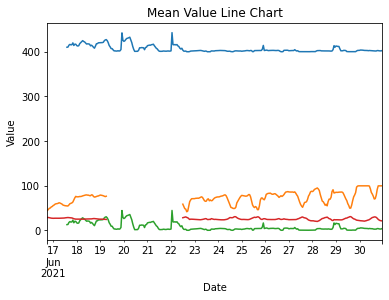

In [119]:
ax_line = grouped_df['co2']['mean'].plot.line()
ax_line = grouped_df['humidity']['mean'].plot.line()
ax_line = grouped_df['nh3']['mean'].plot.line()
ax_line = grouped_df['temp']['mean'].plot.line()

ax_line.set_title('Mean Value Line Chart')
ax_line.set_xlabel("Date")
ax_line.set_ylabel("Value")

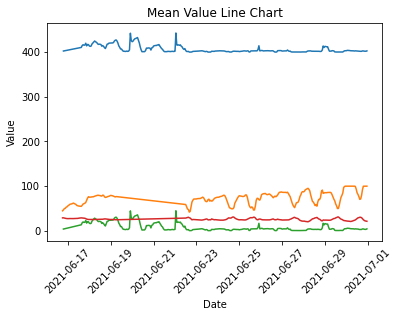

In [120]:
ax_line = sns.lineplot(data=grouped_df['co2']['mean'])
ax_line = sns.lineplot(data=grouped_df['humidity']['mean'])
ax_line = sns.lineplot(data=grouped_df['nh3']['mean'])
ax_line = sns.lineplot(data=grouped_df['temp']['mean'])

ax_line.set_title('Mean Value Line Chart')
ax_line.set_xlabel('Date')
ax_line.set_ylabel('Value')

ax_line.tick_params(axis='x', labelrotation=45)

## 시계열 - Area Chart

Text(0, 0.5, 'Value')

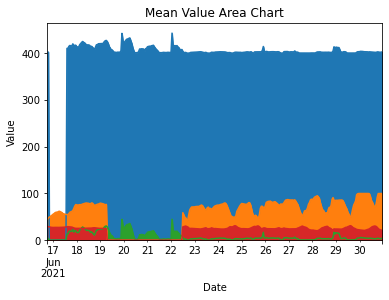

In [121]:
ax_line = grouped_df['co2']['mean'].plot.area()
ax_line = grouped_df['humidity']['mean'].plot.area()
ax_line = grouped_df['nh3']['mean'].plot.area()
ax_line = grouped_df['temp']['mean'].plot.area()

ax_line.set_title('Mean Value Area Chart')
ax_line.set_xlabel("Date")
ax_line.set_ylabel("Value")

## 시계열 - Histogram Chart

<AxesSubplot:xlabel='co2', ylabel='Count'>

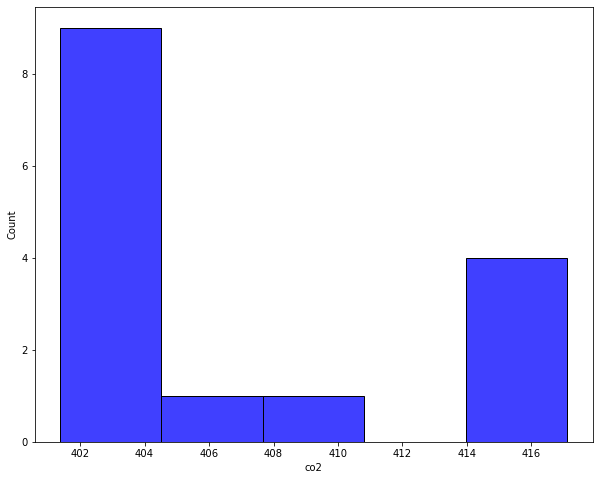

In [122]:
plt.figure(figsize=(10,8))
sns.histplot(data=grouped_df_mean, x= "co2", color = "blue")

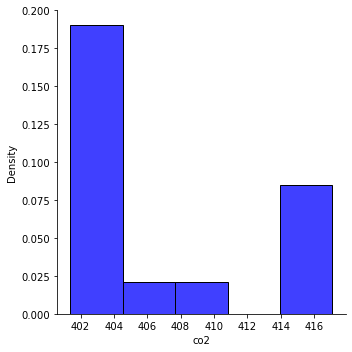

In [123]:
sns.displot(grouped_df_mean, x= "co2", color = "blue", stat="density")

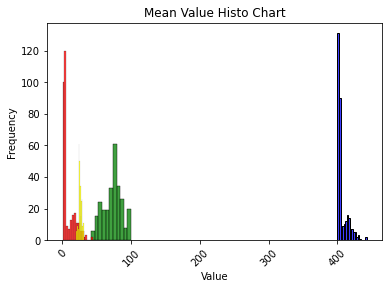

In [124]:
ax_line = sns.histplot(data=grouped_df['co2']['mean'], color='blue')
ax_line = sns.histplot(data=grouped_df['humidity']['mean'], color='green')
ax_line = sns.histplot(data=grouped_df['nh3']['mean'], color='red')
ax_line = sns.histplot(data=grouped_df['temp']['mean'], color='yellow')

ax_line.set_title('Mean Value Histo Chart')
ax_line.set_xlabel('Value')
ax_line.set_ylabel('Frequency')

ax_line.tick_params(axis='x', labelrotation=45)

### 연관성 -  Scatter Chart

<AxesSubplot:title={'center':'nh3 ----- temp'}, xlabel='nh3', ylabel='temp'>

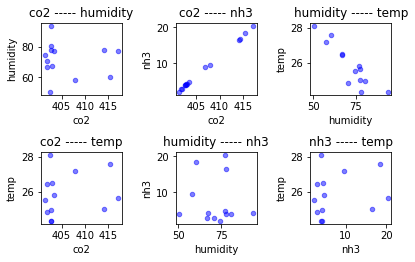

In [125]:
fig, ax = plt.subplots(2, 3)

grouped_df_mean.plot(x='co2' ,y='humidity', color = 'blue', kind = "scatter" ,alpha=0.5, title ='co2 ----- humidity', ax=ax[0, 0])
plt.tight_layout(pad=2, h_pad=1)
grouped_df_mean.plot(x='co2' ,y='nh3', color = 'blue', kind = "scatter" ,alpha=0.5, title ='co2 ----- nh3', ax=ax[0, 1])
plt.tight_layout(pad=2, h_pad=1)
grouped_df_mean.plot(x='co2' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='co2 ----- temp', ax=ax[1, 0])
plt.tight_layout(pad=2, h_pad=1)

grouped_df_mean.plot(x='humidity' ,y='nh3', color = 'blue', kind = "scatter" ,alpha=0.5, title ='humidity ----- nh3', ax=ax[1, 1])
plt.tight_layout(pad=2, h_pad=1)
grouped_df_mean.plot(x='humidity' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='humidity ----- temp', ax=ax[0, 2])
plt.tight_layout(pad=2, h_pad=1)
grouped_df_mean.plot(x='nh3' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='nh3 ----- temp', ax=ax[1, 2])

## 연관성 - Bubble Chart

<AxesSubplot:xlabel='co2', ylabel='temp'>

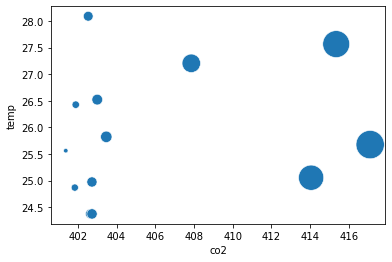

In [126]:
fig, ax = plt.subplots()
sns.scatterplot(data=grouped_df_mean, x="co2", y="temp", size="nh3", legend=False, sizes=(20, 800))

<AxesSubplot:xlabel='humidity', ylabel='temp'>

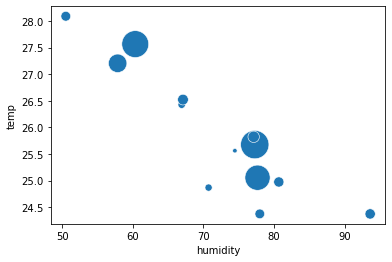

In [127]:
sns.scatterplot(data=grouped_df_mean, x="humidity", y="temp", size="nh3", legend=False, sizes=(20, 800))

## 비교, 순위 - Heat Map

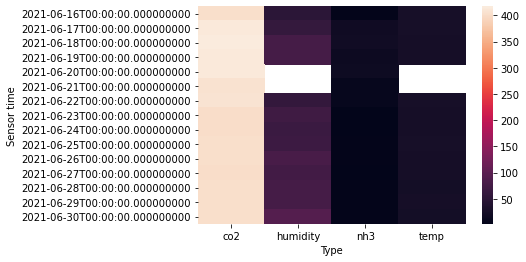

In [128]:
ax = sns.heatmap(grouped_df_mean)
plt.show() 

## 분포 - Box Plot

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Temp Box Plot')]

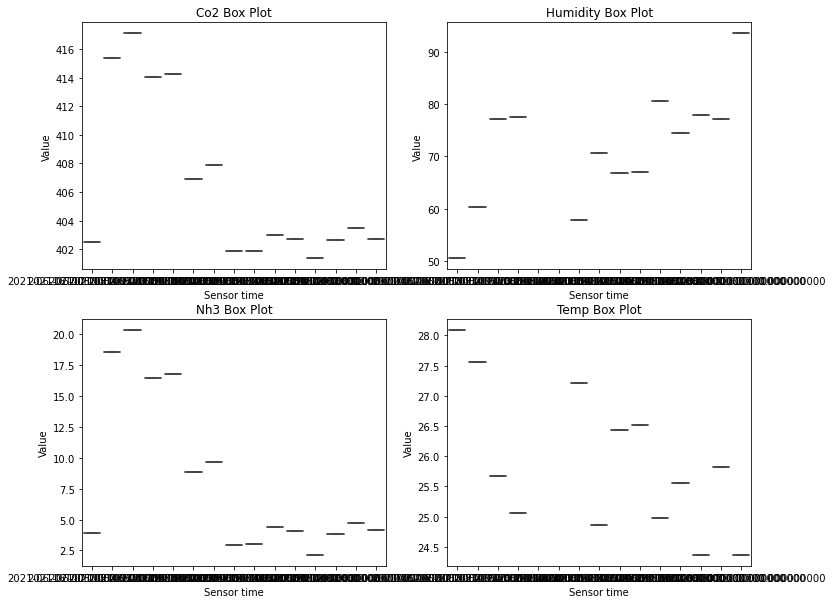

In [131]:
grouped_df_mean_reset_index = grouped_df_mean.reset_index()

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

sns.boxplot(data=grouped_df_mean_reset_index,y="co2",x="Sensor time", orient="v",ax=axes[0][0])
sns.boxplot(data=grouped_df_mean_reset_index,y="humidity",x="Sensor time",orient="v",ax=axes[0][1])
sns.boxplot(data=grouped_df_mean_reset_index,y="nh3",x="Sensor time",orient="v",ax=axes[1][0])
sns.boxplot(data=grouped_df_mean_reset_index,y="temp",x="Sensor time",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Value',title="Co2 Box Plot")
axes[0][1].set(ylabel='Value',title="Humidity Box Plot")
axes[1][0].set(ylabel='Value',title="Nh3 Box Plot")
axes[1][1].set(ylabel='Value',title="Temp Box Plot")


# plt.subplots(nrows=2, ncols=2)

# # plt.boxplot([grouped_df_mean["co2"].to_list(),grouped_df_mean["temp"].to_list()])
# # plt.show()

# ax = sns.boxplot(x=grouped_df_mean["co2"])
# ax = sns.boxplot(x=grouped_df_mean["humidity"])
# ax = sns.boxplot(x=grouped_df_mean["nh3"])
# ax = sns.boxplot(x=grouped_df_mean["temp"])